<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [385]:
from google.colab import drive

In [386]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [387]:
train=("/content/drive/My Drive/Colab Notebooks/Loan Prediction/Loan_Train.csv")
test=("/content/drive/My Drive/Colab Notebooks/Loan Prediction/Loan_Test.csv")

In [388]:
import pandas as pd
df_train=pd.read_csv(train)
df_test=pd.read_csv(test)

In [389]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [390]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [391]:
import numpy as np
import os
import warnings

#Viz
import matplotlib.pyplot as plt
import seaborn as sns

#Relevant ML Package

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Machine Learning Model
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Config the Theme of Viz
sns.set(style="darkgrid")

warnings.filterwarnings("ignore")

print("Semua modul sudah di set")

Semua modul sudah di set


In [392]:
#EDA
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [393]:
df_train.shape

(614, 13)

In [394]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [395]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [396]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [397]:
#Akan diganti kolom Kredit Histori menjadi objek karena dia bukan hitungan float
df_train['Credit_History']=df_train['Credit_History'].astype('O')
df_test['Credit_History']=df_test['Credit_History'].astype('O')

In [398]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [399]:
#Akan dibuang kolom Loan_ID
df_train.drop(columns='Loan_ID',axis=1,inplace=True)

In [400]:
df_test.drop(columns='Loan_ID', axis=1, inplace=True)

In [401]:
df_train.duplicated().sum()

0

Persentase Y : 0.69
Persentase X : 0.31


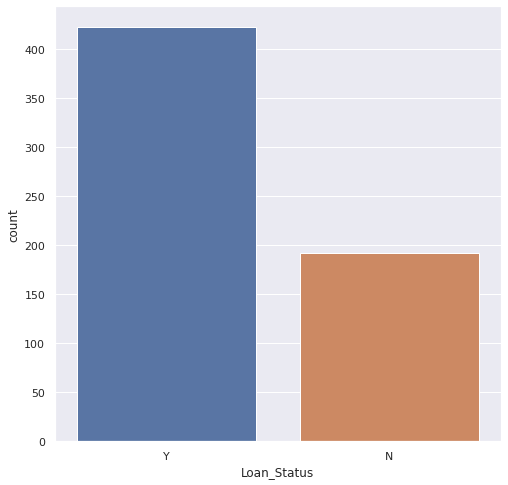

In [402]:
plt.figure(figsize=(8,8))
sns.countplot(df_train['Loan_Status'])
print("Persentase Y : %.2f" % (df_train['Loan_Status'].value_counts()[0]/len(df_train)))
print("Persentase X : %.2f" % (df_train['Loan_Status'].value_counts()[1]/len(df_train)))

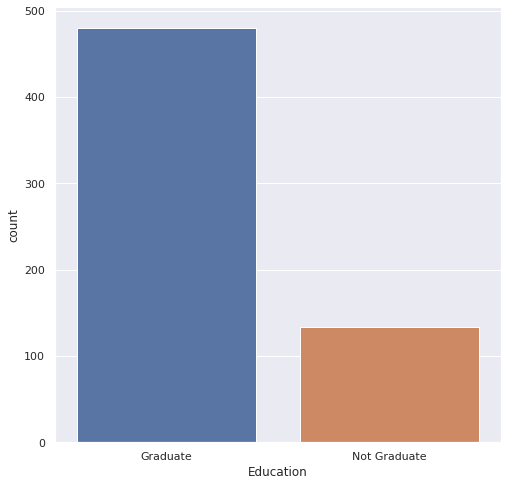

In [403]:
plt.figure(figsize=(8,8))
sns.countplot(df_train['Education'])

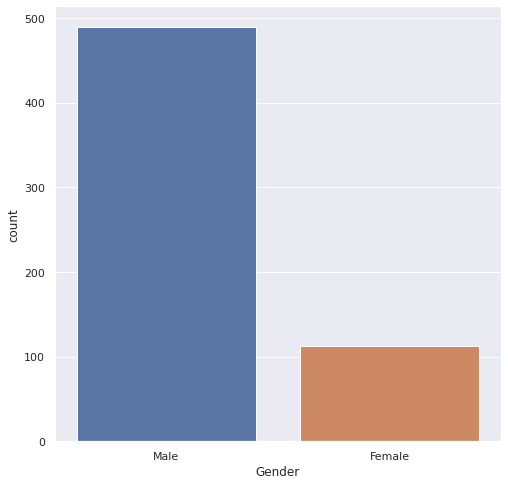

In [404]:
plt.figure(figsize=(8,8))
sns.countplot(df_train['Gender'])

In [405]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

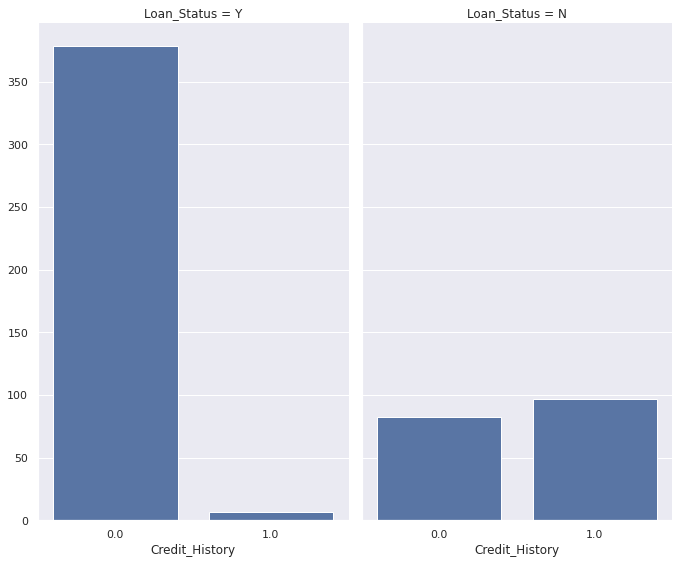

In [406]:
grid=sns.FacetGrid(df_train,col='Loan_Status',size=8, aspect=0.6)
grid.map(sns.countplot, 'Credit_History')

In [407]:
#Data Cleaning

df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [408]:
#Karena data sudah di pisah maka akan digabungkan dan disesuaikan dengan metode standar
df_train.append(df_test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1,Urban,NaN
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1,Urban,NaN
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1,Rural,NaN


In [409]:
df=df_train.copy()

In [410]:
df.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [411]:
le=LabelEncoder()

In [412]:
df['Gender']=df['Gender'].astype(str)
df['Gender']=le.fit_transform(df['Gender'])

df['Married']=df['Married'].astype(str)
df['Married']=le.fit_transform(df['Married'])

df['Dependents']=df['Dependents'].astype(str)
df['Dependents']=le.fit_transform(df['Dependents'])

df['Self_Employed']=df['Self_Employed'].astype(str)
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

df['Property_Area']=df['Property_Area'].astype(str)
df['Property_Area']=le.fit_transform(df['Property_Area'])

df['Loan_Status']=df['Loan_Status'].astype(str)
df['Loan_Status']=le.fit_transform(df['Loan_Status'])


df['Education']=df['Education'].astype(str)
df['Education']=le.fit_transform(df['Education'])
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [413]:
df.isna().sum()
df=df.dropna()

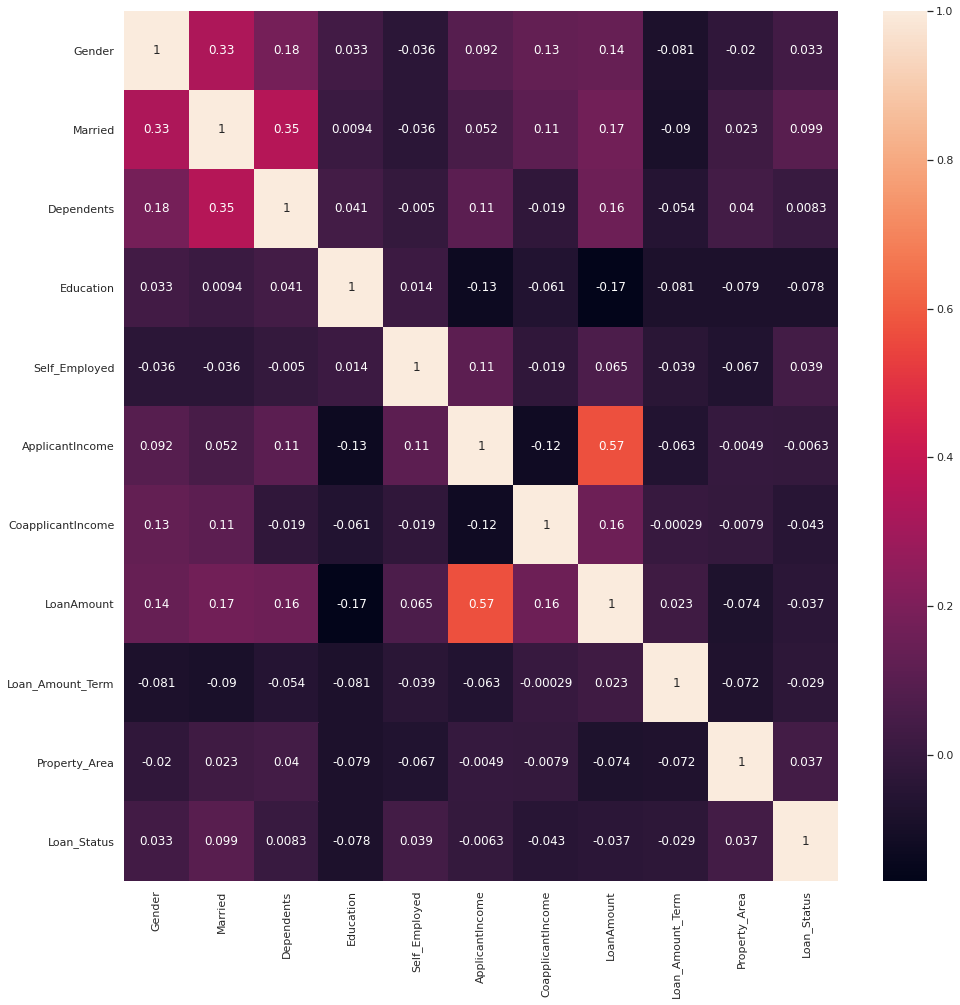

In [414]:
plt.figure(figsize=(16,16))
_=sns.heatmap(df.corr(), annot=True)

In [415]:
X=df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']


X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=12)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2


In [416]:
#1 Machine Learning dengan Random Forest
RF=RandomForestClassifier()
model=RF.fit(X_train,Y_train)

In [417]:
Y_pred=model.predict(X_test)
print("Akurasi Model yaitu sebesar :", accuracy_score(Y_test,Y_pred))

Akurasi Model yaitu sebesar : 0.8301886792452831


Confusion Matrix dari model tersebut yaitu : 


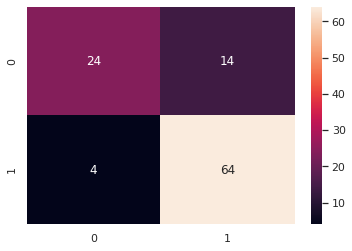

In [418]:
print("Confusion Matrix dari model tersebut yaitu : ")
cm=(confusion_matrix(Y_test,Y_pred))
_=sns.heatmap(cm,annot=True)

In [419]:
#2. Menggunakan Decision Tree
DC=DecisionTreeClassifier()
model3=DC.fit(X_train,Y_train)

In [420]:
Y_pred=model3.predict(X_test)

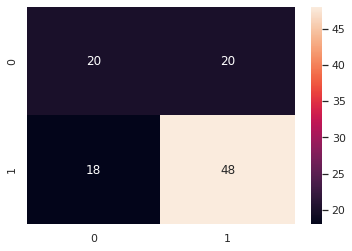

In [421]:
cm=confusion_matrix(Y_pred, Y_test)
_=sns.heatmap(cm,annot=True)

In [422]:
print("Skor Akurasi model Decisiob Tree yaitu:", accuracy_score(Y_test,Y_pred))

Skor Akurasi model Decisiob Tree yaitu: 0.6415094339622641


In [423]:
#3. KNearesNeighbor Classifier

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
model4=KN.fit(X_train, Y_train)

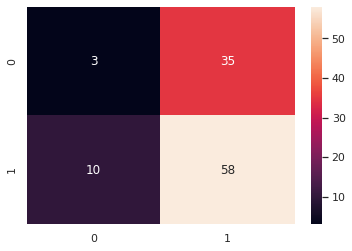

In [424]:
Y_pred=model4.predict(X_test)
_=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [425]:
print("Akurasi Score model tersebut :", accuracy_score(Y_test,Y_pred))

Akurasi Score model tersebut : 0.5754716981132075


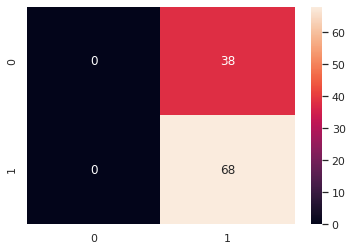

In [426]:
#4.Model SVC
from sklearn.svm import SVC
S=SVC()
model5=S.fit(X_train,Y_train)
Y_pred=model5.predict(X_test)
_=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [427]:
print("Akurasi Skor Model tersebut", accuracy_score(Y_test, Y_pred))

Akurasi Skor Model tersebut 0.6415094339622641


In [428]:
#Model Terbaik yaitu model Random Forest dengan akurasi sebesar 83.01%

In [439]:
#Test Manual
model.predict([[0,0,0,0,1,4583,0,133,360,0,1]])

array([0])

In [ ]:
#Angka Nol menyatakan tidak dimana hasilnya sama seperti aktual dibuktikan pada baris di bawah yang menyatakan Loan Status 0

In [441]:
df.loc[::613]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
